Using Keras to load the dataset


In [1]:
import tensorflow as tf

In [2]:
 fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
 (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
 X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
 X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
 class_names[y_train[1]]

'T-shirt/top'

In [8]:
# tf.random.set_seed(42)
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=[28, 28]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(300, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [9]:
 model = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=[28, 28]),
 tf.keras.layers.Dense(300, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
 ])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]

In [13]:
hidden1.name

'dense_3'

In [14]:
hidden2 = model.layers[2]

In [15]:
hidden2.name

'dense_4'

In [16]:
weights, biases = hidden1.get_weights()

In [17]:
weights

array([[ 0.0499995 ,  0.04015118, -0.05887901, ..., -0.00678474,
        -0.01241467,  0.06582922],
       [-0.06316209, -0.02432456,  0.01272523, ..., -0.02936108,
         0.03540798,  0.03174728],
       [-0.02257631, -0.07418719,  0.05967329, ...,  0.00039043,
         0.04962358, -0.05463112],
       ...,
       [-0.07378275,  0.01502162, -0.01812356, ..., -0.05662638,
        -0.03262784,  0.02389698],
       [-0.02168935, -0.06574615,  0.02886905, ..., -0.07185147,
         0.02907268,  0.00138066],
       [ 0.05980477, -0.01045279, -0.0381907 , ...,  0.002721  ,
        -0.04999061,  0.01377575]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd" ,metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7252 - accuracy: 0.7608 - val_loss: 0.5078 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4921 - accuracy: 0.8288 - val_loss: 0.4649 - val_accuracy: 0.8346
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4453 - accuracy: 0.8435 - val_loss: 0.4287 - val_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4208 - accuracy: 0.8532 - val_loss: 0.4010 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3997 - accuracy: 0.8597 - val_loss: 0.3968 - val_accuracy: 0.8578
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3835 - accuracy: 0.8647 - val_loss: 0.4015 - val_accuracy: 0.8604
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3713 - accuracy: 0.8681 - val_loss: 0.3815 - val_accuracy:

In [24]:
 import matplotlib.pyplot as plt
 import pandas as pd


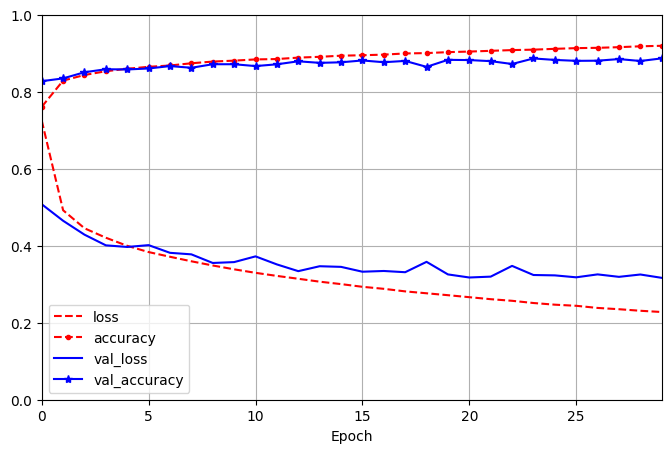

In [25]:
 pd.DataFrame(history.history).plot(
 figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])
 plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3284 - accuracy: 0.8831


[0.3283703625202179, 0.8830999732017517]

In [27]:
x_new = X_test[:3]

In [28]:
y_proba = model.predict(x_new)

1/1 [==============================] - 0s 78ms/step


In [29]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
# ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [31]:
import numpy as np

In [32]:
y_pred = y_proba.argmax(axis=-1)

In [33]:
y_pred

array([9, 2, 1])

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]

In [36]:
y_new

array([9, 2, 1], dtype=uint8)